## Import dependencies

In [1]:
import pytorch_lightning as pl
import sys
sys.path.append('../')

import src.data.dataset as dataset
import src.models.glucose_insulin as gi
import src.utils.utils as utils

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


## Load pretrained models

In [3]:
loaded_model = utils.load_model(gi.GIModel, '../pretrained_models/gamma_model.pth', lr=0.01, nutrition_model='gamma')
for name, param in loaded_model.named_parameters():
    print(f"Parameter: {name}, Value: {param.data}")

Model loaded from ../pretrained_models/gamma_model.pth
Parameter: p1, Value: 0.4935648739337921
Parameter: p2, Value: 0.885363757610321
Parameter: p3, Value: -0.08541222661733627
Parameter: p4, Value: -0.08431708812713623
Parameter: p5, Value: 97.71422576904297
Parameter: p6, Value: 0.8853634595870972
Parameter: Gb, Value: 77.9916000366211
Parameter: Ib, Value: 14.797350883483887
Parameter: nutrition_model.k, Value: tensor([ 9.6189,  7.4940,  9.2239,  8.9730, 10.0118, 10.0031])
Parameter: nutrition_model.theta, Value: tensor([2.4237, 1.3567, 2.0240, 1.7909, 2.8142, 2.6898])


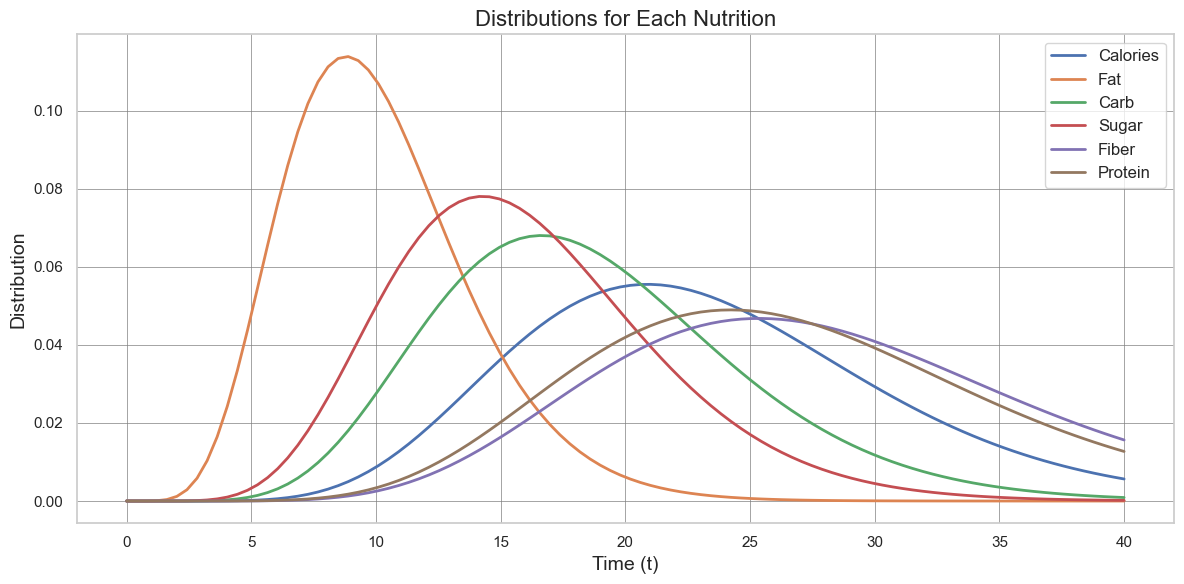

In [4]:
loaded_model.nutrition_model.plot_nutrition_distributions(filename='gamma_nutrition_distributions.png')

In [6]:
loaded_model.nutrition_model.theta

Parameter containing:
tensor([2.4237, 1.3567, 2.0240, 1.7909, 2.8142, 2.6898], requires_grad=True)

## Load finetune and test dataset

In [7]:
finetune_dataset= dataset.GlucoseRecordings(gv_recordings_path='../data/Patient002_d.tsv')
finetune_loader = finetune_dataset.get_data_loader()

# test_dataset= dataset.GlucoseRecordings(gv_recordings_path='../data/user-2133-037/test.tsv')

## Fine tune the model

In [8]:
loss_logger = utils.LossLogger()
trainer = pl.Trainer(max_epochs=80, callbacks=[loss_logger])
trainer.fit(loaded_model, finetune_loader)
for name, param in loaded_model.named_parameters():
    print(f"Parameter: {name}, Value: {param.data}")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type                | Params | Mode 
----------------------------------------------------------------
0 | nutrition_model | GammaNutritionModel | 12     | train
1 | loss_fn         | MSELoss             | 0      | train
  | other params    | n/a                 | 8      | n/a  
----------------------------------------------------------------
20        Trainable params
0         Non-trainable params
20        Total params
0.000     Total estimated model params size (MB)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\l

Epoch 79: 100%|██████████| 2/2 [00:00<00:00,  6.87it/s, v_num=1, train_loss_step=144.0, train_loss_epoch=182.0]    

`Trainer.fit` stopped: `max_epochs=80` reached.


Epoch 79: 100%|██████████| 2/2 [00:00<00:00,  6.42it/s, v_num=1, train_loss_step=144.0, train_loss_epoch=182.0]
Parameter: p1, Value: 0.16678519546985626
Parameter: p2, Value: 1.126763105392456
Parameter: p3, Value: 0.011950867250561714
Parameter: p4, Value: -0.01362252701073885
Parameter: p5, Value: 97.91680145263672
Parameter: p6, Value: 1.1267622709274292
Parameter: Gb, Value: 78.4341049194336
Parameter: Ib, Value: 14.947402000427246
Parameter: nutrition_model.k, Value: tensor([9.2734, 6.7731, 8.6755, 8.3562, 9.6111, 9.6088])
Parameter: nutrition_model.theta, Value: tensor([2.0731, 0.4523, 1.4806, 1.1950, 2.4099, 2.2871])


## Plot finetune loss

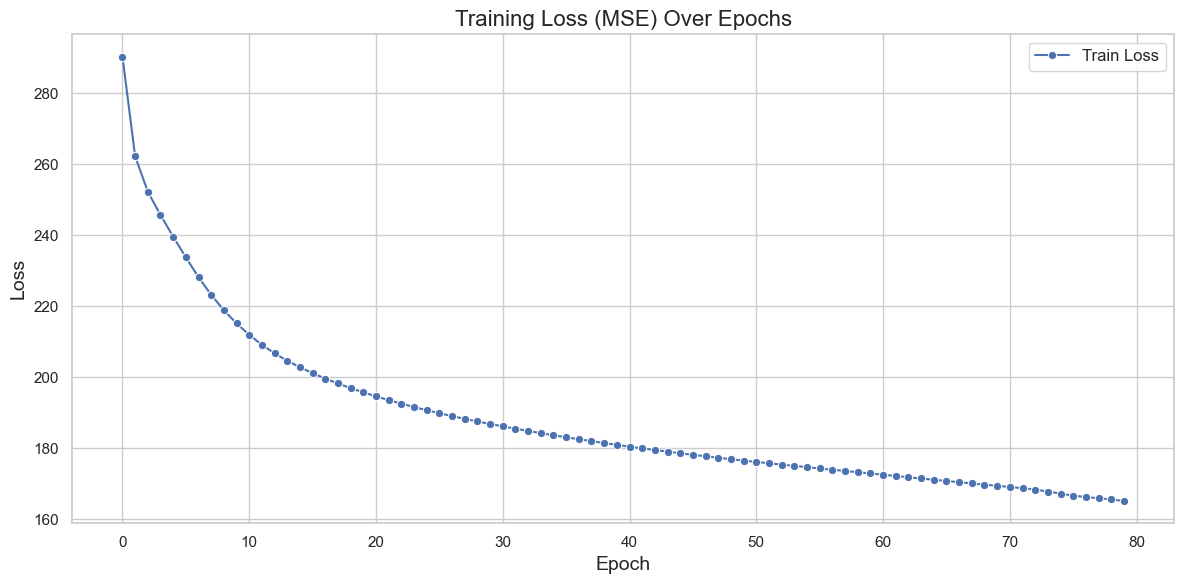

In [6]:
loss_logger.plot_losses()

## Evaluate and plot prediction on test dataset

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 13.89it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    497.24212646484375     │
└───────────────────────────┴───────────────────────────┘

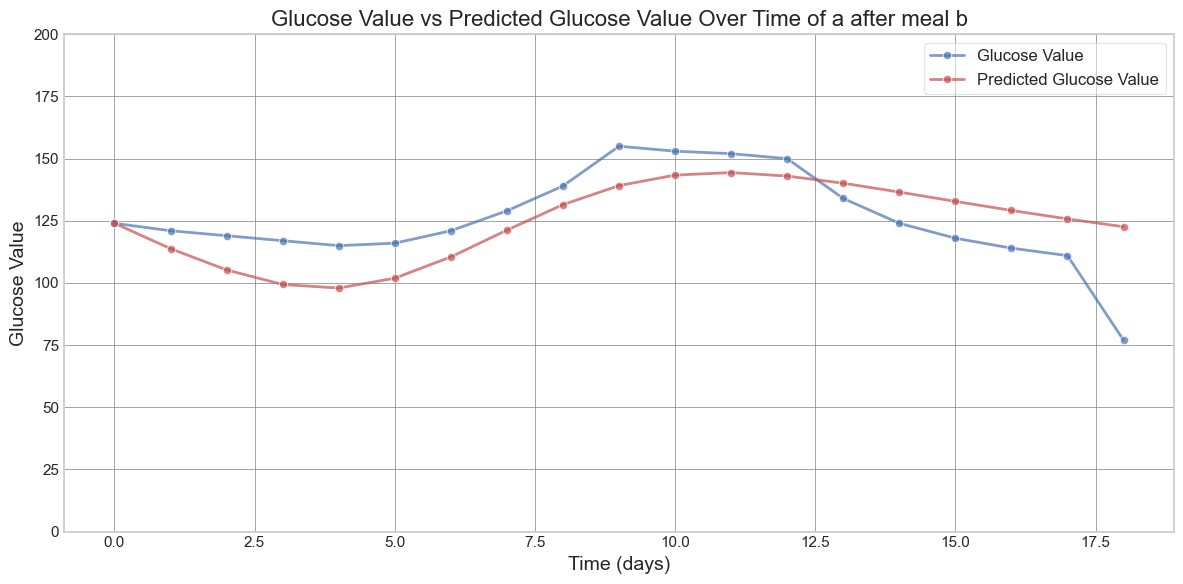

In [23]:
trainer.test(loaded_model, test_dataset.get_data_loader())
loaded_model.plot_prediction(test_dataset[0], filename='gamma_predictions.png', userID='a', meal='b')